### Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import re
import os
import requests
import seaborn as sns
import tweepy

from datetime import datetime
from functools import reduce

## Gathering data

### Twitter archive

In [2]:
twitter_1 = pd.read_csv('twitter-archive-enhanced.csv')

### Image predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
images = pd.read_csv('image_predictions.tsv', sep = '\t')

### Twitter API

In [5]:
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
tweet_ids = list(twitter_1['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311

762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151

707969809498152960
707776935007539200
707741517457260545
707738799544082433
707693576495472641
707629649552134146
707610948723478529
707420581654872064
707411934438625280
707387676719185920
707377100785885184
707315916783140866
707297311098011648
707059547140169728
707038192327901184
707021089608753152
707014260413456384
706904523814649856
706901761596989440
706681918348251136
706644897839910912
706593038911545345
706538006853918722
706516534877929472
706346369204748288
706310011488698368
706291001778950144
706265994973601792
706169069255446529
706166467411222528
706153300320784384
705975130514706432
705970349788291072
705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748

679872969355714560
679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
679462823135686656
679405845277462528
679158373988876288
679148763231985668
679132435750195208
679111216690831360
679062614270468097
679047485189439488
679001094530465792
678991772295516161
678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346941444
678764513869611008
678755239630127104
678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327

669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807423489
668967877119254528
668960084974809088
668955713004314625
668932921458302977
668902994700836864
668892474547511297
668872652652679168
668852170888998912
668826086256599040
668815180734689280
668779399630725120
668655139528511488
668645506898350081
668643542311546881
668641109086707712
668636665813057536
668633411083464705
668631377374486528
668627278264475648
668625577880875008
668623201287675904
668620235289837568
668614819948453888
668587383441

In [9]:
twitter_2 = pd.read_json('tweet_json.txt', lines = True)
twitter_2['tweet_id'] = twitter_2['user'].apply(lambda x: x['id'])
twitter_2 = twitter_2[['tweet_id', 'favorite_count', 'retweet_count']]
twitter_2.sample(3)

,tweet_id,favorite_count,retweet_count
1313,4196983835,3627,1103
2124,4196983835,451,122
274,4196983835,13377,1116


### Assessing data

In [57]:
twitter_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_1['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [18]:
twitter_1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_1['text'].value_counts()

This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd                                                                           1
This is Sebastian. He's super h*ckin fluffy. That's really all you need to know. 11/10 would snug intensely https://t.co/lqr0NdtwQo                                       1
This is Brody. He's trying to make the same face as the football. 12/10 https://t.co/2H4MfOGlpQ                                                                           1
Meet Strudel. He's rather h*ckin pupset that your clothes clash. 11/10 click the link to see how u can help Strudel\n\nhttps://t.co/3uxgLz8d0l https://t.co/O0ECL1StB2    1
Here's a super majestic doggo and a sunset 11/10 https://t.co/UACnoyi8zu                                                                                                  1
This pupper forgot how to walk. 12/10 happens to all of us (vid by @bbuckley96) https://t.co/KFTrkSOuu3                                     

In [21]:
twitter_1['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [22]:
twitter_1['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [23]:
twitter_1['retweeted_status_timestamp'].value_counts()

2016-01-03 05:11:12 +0000    1
2017-06-23 16:00:04 +0000    1
2017-06-09 16:22:42 +0000    1
2016-09-11 21:34:30 +0000    1
2016-08-08 17:19:51 +0000    1
2016-09-06 23:56:05 +0000    1
2016-06-05 19:47:03 +0000    1
2016-07-22 00:43:32 +0000    1
2016-08-23 21:09:14 +0000    1
2015-11-21 00:46:50 +0000    1
2017-03-07 00:15:46 +0000    1
2016-02-12 17:22:12 +0000    1
2016-09-25 00:06:08 +0000    1
2016-01-25 00:26:41 +0000    1
2016-10-23 19:42:02 +0000    1
2016-03-21 19:29:52 +0000    1
2016-10-06 01:23:05 +0000    1
2016-08-22 16:06:54 +0000    1
2017-01-06 17:33:29 +0000    1
2016-10-04 15:55:06 +0000    1
2016-12-17 00:38:52 +0000    1
2016-06-08 22:48:46 +0000    1
2017-02-28 18:43:57 +0000    1
2015-12-06 00:17:55 +0000    1
2016-01-06 20:16:44 +0000    1
2017-05-28 17:23:24 +0000    1
2016-03-20 23:23:54 +0000    1
2016-10-21 18:16:44 +0000    1
2015-12-21 22:15:18 +0000    1
2015-11-28 03:31:48 +0000    1
                            ..
2016-07-27 00:40:12 +0000    1
2016-11-

In [24]:
twitter_1['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/753375668877008896/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/810254108431155201/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1                                              2
https://twitter.com/dog_rates/status/761672994376806400/video/1                            

In [25]:
twitter_1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
twitter_1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
twitter_1['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Toby           7
Daisy          7
an             7
Buddy          7
Bella          6
Koda           6
Oscar          6
Leo            6
Dave           6
Stanley        6
Milo           6
Scout          6
Rusty          6
Jack           6
Jax            6
Louis          5
            ... 
Tino           1
Jeremy         1
Jeffri         1
Juckson        1
Mike           1
Karll          1
Tycho          1
Steve          1
Scruffers      1
Philippe       1
Carbon         1
Jeb            1
Franq          1
Cedrick        1
Rumpole        1
Rhino          1
Kramer         1
Dudley         1
Ferg           1
Dotsy          1
Donny          1
Schnitzel      1
Jimbo          1
Chaz           1
Batdog         1
Kanu           1
Beckham        1
Bradley       

In [29]:
twitter_1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
twitter_1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
twitter_1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [32]:
twitter_1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [33]:
twitter_1.loc[twitter_1['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [58]:
twitter_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [35]:
twitter_2['tweet_id'].value_counts()

4196983835    2354
Name: tweet_id, dtype: int64

In [37]:
twitter_2['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [38]:
twitter_2['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [59]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
images['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [40]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                       

In [41]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [42]:
images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [43]:
images['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [44]:
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [45]:
images['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
malinois                           20
Samoyed                            20
miniature_pinscher                 20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [46]:
images['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [47]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [48]:
images['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [49]:
images['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
0.077130    2
0.116806    2
0.146427    2
0.003956    2
0.039012    2
0.137186    2
0.109677    2
0.096435    2
0.157028    2
0.157524    2
0.118199    2
0.016497    2
0.100842    2
0.151024    2
0.005410    2
0.026364    2
0.186789    2
0.223263    2
0.087355    2
0.121523    2
0.041476    2
0.071436    2
0.046403    2
0.014858    2
0.003330    2
           ..
0.098207    1
0.013206    1
0.106014    1
0.044002    1
0.127037    1
0.001404    1
0.001274    1
0.008451    1
0.039808    1
0.056548    1
0.001310    1
0.016663    1
0.079883    1
0.122701    1
0.047397    1
0.068297    1
0.031673    1
0.047601    1
0.019516    1
0.051835    1
0.078720    1
0.143328    1
0.000436    1
0.003383    1
0.109454    1
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [50]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Cleaning

In [75]:
twitter1_clean = twitter_1.copy()
twitter2_clean = twitter_2.copy()
images_clean = images.copy()

In [76]:
# Mergering the three data sets
twitter = pd.merge(left = twitter1_clean, right = twitter2_clean, left_index = True, right_index = True, how = 'left')
twitter = pd.merge(left = twitter, right = images_clean, left_index = True, right_index = True, how = 'left')

In [69]:
twitter.head()

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [70]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id_x                    2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id_y                    23

### Tidiness issue: 1. Mergering data sets;  2. Simplifying dog stages.

In [77]:
# Extracting dog stages from 'text' column to a new 'dog_stage' column, and dropping them 
twitter['dog_stage'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [78]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id_x                    2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
tweet_id_y                    2354 non-null float64
favorite_count                2354 non-null float64
retweet_count                 2354 non-null float64
tweet_id                      2075 non-null float64
jpg_url                     

### Quality issue: 1. Removing retweets;  2. setting 'tweet_id' as string and;   3. 'timestamp' as datetime form.

In [79]:
twitter = twitter[np.isnan(twitter.retweeted_status_id)]
print(twitter.info())
twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id_x                    2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
tweet_id_y                    2173 non-null float64
favorite_count                2173 non-null float64
retweet_count                 2173 non-null float64
tweet_id                      1896 non-null float64
jpg_url                       1896

In [80]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id_x               2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
tweet_id_y               2173 non-null float64
favorite_count           2173 non-null float64
retweet_count            2173 non-null float64
tweet_id                 1896 non-null float64
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog                   1896 non-null object
p2                

In [81]:
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

In [82]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id_x               2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
tweet_id_y               2173 non-null float64
favorite_count           2173 non-null float64
retweet_count            2173 non-null float64
tweet_id                 2175 non-null object
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog                   1896 non-null object
p2                 

In [83]:
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [84]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id_x               2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
tweet_id_y               2173 non-null float64
favorite_count           2173 non-null float64
retweet_count            2173 non-null float64
tweet_id                 2175 non-null object
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog                   1896 non-null object
p2         

### Quality issue: 4. & 5. Lower case for names and misspelling of names;   6. Inaccuracy of ratings.

In [85]:
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [86]:
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)
twitter['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

In [87]:
twitter['name'].value_counts()

Charlie        11
Lucy           11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Winston         8
Lola            8
Sadie           8
Daisy           7
Toby            7
Bailey          6
Stanley         6
Oscar           6
Jax             6
Koda            6
Bo              6
Bella           6
Dave            5
Leo             5
Rusty           5
Milo            5
Scout           5
Buddy           5
Bentley         5
Louis           5
Chester         5
Clarence        4
Maggie          4
George          4
               ..
Rilo            1
Huxley          1
Sid             1
Terrance        1
Bradley         1
Kanu            1
Shakespeare     1
Batdog          1
Enchilada       1
Snoop           1
Doobert         1
Philippe        1
Carbon          1
Jeb             1
Franq           1
Cecil           1
Cedrick         1
Rumpole         1
Miguel          1
Rhino           1
Kramer          1
Dudley          1
Scruffers       1
Ferg            1
Tug       

In [88]:
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [89]:
ratings_with_decimals_index

[45, 695, 763, 1689, 1712]

In [90]:
twitter.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

In [91]:
twitter.loc[50]

tweet_id_x                                              882627270321602560
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2017-07-05 15:48:34
source                   <a href="http://twitter.com/download/iphone" r...
text                     This is Stanley. He has his first swim lesson ...
expanded_urls            https://twitter.com/dog_rates/status/882627270...
rating_numerator                                                        13
rating_denominator                                                      10
name                                                               Stanley
tweet_id_y                                                     4.19698e+09
favorite_count                                                       45880
retweet_count                                                        12118
tweet_id                 

### Quality issue: 7. Renaming some columns and;  8. Deleting some irrelevant ones.

In [92]:
twitter.columns

Index(['tweet_id_x', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_id_y', 'favorite_count',
       'retweet_count', 'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_stage'],
      dtype='object')

In [93]:
twitter.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)
twitter.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

In [94]:
twitter['rating'] = twitter['numerator']/twitter['denominator']

In [95]:
twitter.sample(5)

,tweet_id_x,timestamp,text,expanded_urls,numerator,denominator,name,tweet_id_y,favorite_count,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
229,848212111729840128,2017-04-01 16:35:01,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6.0,10,Jerry,4.196984e+09,0.0,3652.0,...,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True,NaN,0.6
1409,699060279947165696,2016-02-15 02:38:53,This is Yukon. He pukes rainbows. 12/10 magica...,https://vine.co/v/inlmMHxtqDD,12.0,10,Yukon,4.196984e+09,3701.0,1113.0,...,0.580528,False,maillot,0.081449,False,golden_retriever,0.053570,True,NaN,1.2
1215,715009755312439296,2016-03-30 02:56:24,This is Siba. She's remarkably mobile. Very sl...,https://twitter.com/dog_rates/status/715009755...,12.0,10,Siba,4.196984e+09,8028.0,4816.0,...,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False,NaN,1.2
1674,682259524040966145,2015-12-30 17:58:40,Meet Jax. He's an Iglesias Hufflepoof. Quite t...,https://twitter.com/dog_rates/status/682259524...,9.0,10,Jax,4.196984e+09,20108.0,11271.0,...,0.848735,True,Ibizan_hound,0.044603,True,Italian_greyhound,0.018611,True,NaN,0.9
1498,692417313023332352,2016-01-27 18:42:06,Meet Herschel. He's slightly bigger than ur av...,https://twitter.com/dog_rates/status/692417313...,7.0,10,Herschel,4.196984e+09,2369.0,896.0,...,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True,pupper,0.7


In [96]:
twitter.to_csv('twitter_archive_master.csv')

### Data analyzing and visualizing

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


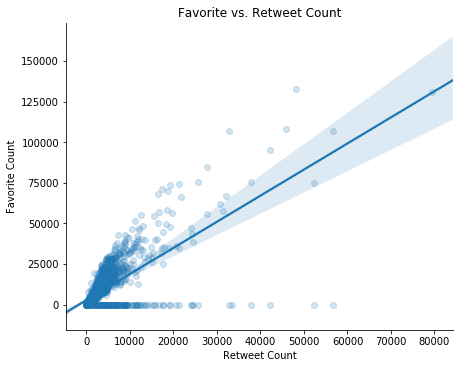

In [97]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

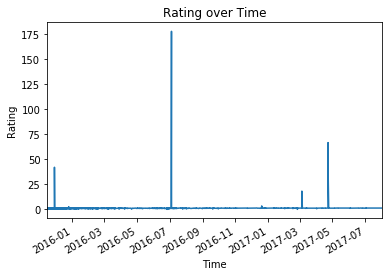

In [98]:
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.show;

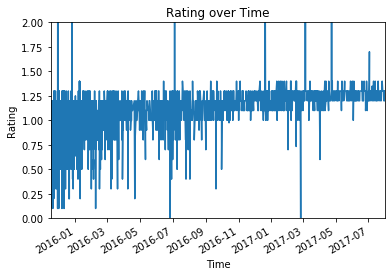

In [99]:
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.show;